In [9]:
import pylab as plt
import numpy as np
import os
from PIL import Image

IMAGE_DIR = "./images/"
IMAGE_SIZE = 96
IMAGE_TOTAL_SIZE = 96*10
num = IMAGE_TOTAL_SIZE//IMAGE_SIZE

list = []
for root,dirs,files in os.walk(IMAGE_DIR):
    for file in files:
        filepath = os.path.join(root,file)
        image = Image.open(filepath)
        if image.mode != "RGB":
            image = image.convert("RGB")
        image_data = np.array(image).astype(np.uint8)
        list.append(image_data)
        
list = np.array(list)

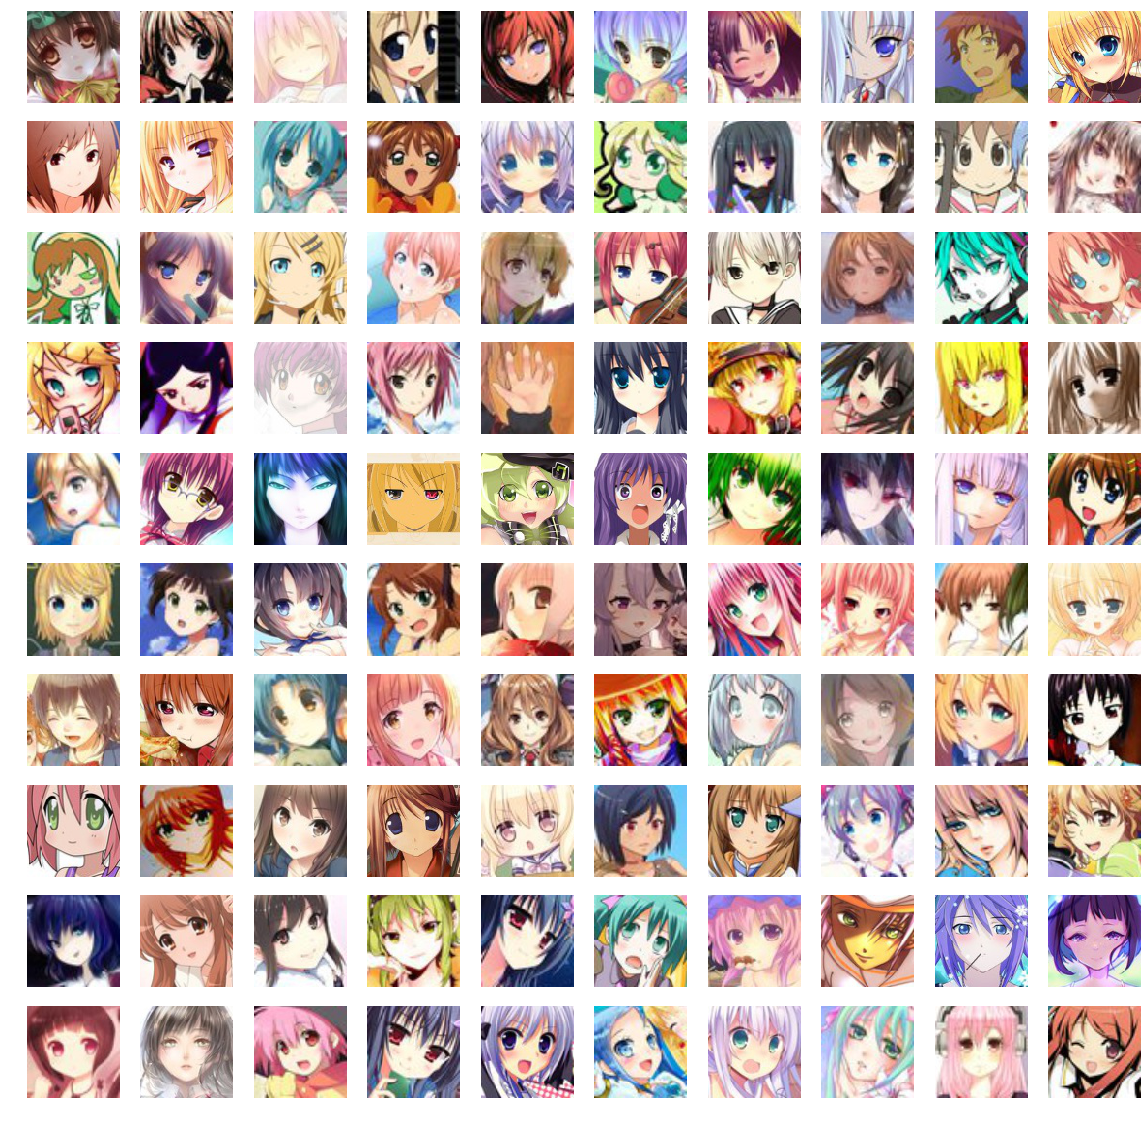

In [10]:
fig = plt.figure(figsize=(20,20))
for index,data in enumerate(list):
    row = index//num
    col = index%num
    ax = plt.subplot2grid((num,num),(row,col),fig=fig)
    ax.imshow(data)
    ax.axis("off")
plt.axis("off")
plt.show()

image_np.shape =  (960, 960, 3)


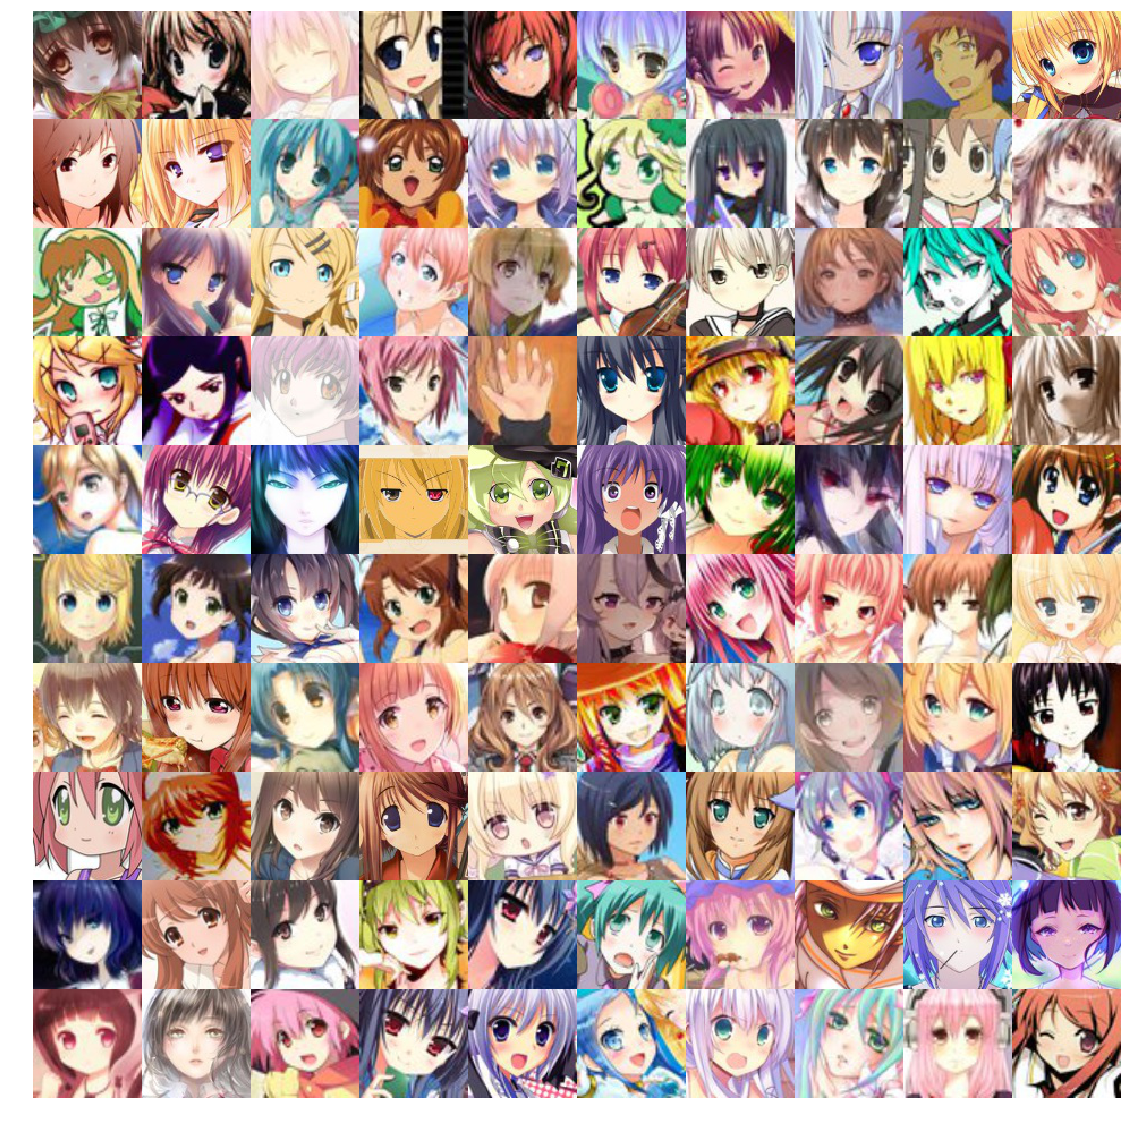

In [13]:
#combine using pil image
targetImage = Image.new("RGB",(IMAGE_TOTAL_SIZE,IMAGE_TOTAL_SIZE))
for index,data in enumerate(list):
    row = index//num
    col = index%num
    subImage = Image.fromarray(data,mode='RGB')
    targetImage.paste(subImage,(col*IMAGE_SIZE,
                                row*IMAGE_SIZE,
                                (col + 1)*IMAGE_SIZE,
                                (row + 1)*IMAGE_SIZE)
                     )
#targetImage.show()
targetImage.save("./export_images.jpg","jpeg")
plt.figure(figsize=(20,20))
image_np = np.array(targetImage)
print("image_np.shape = ",image_np.shape)
plt.imshow(image_np)
plt.axis("off")
plt.show()

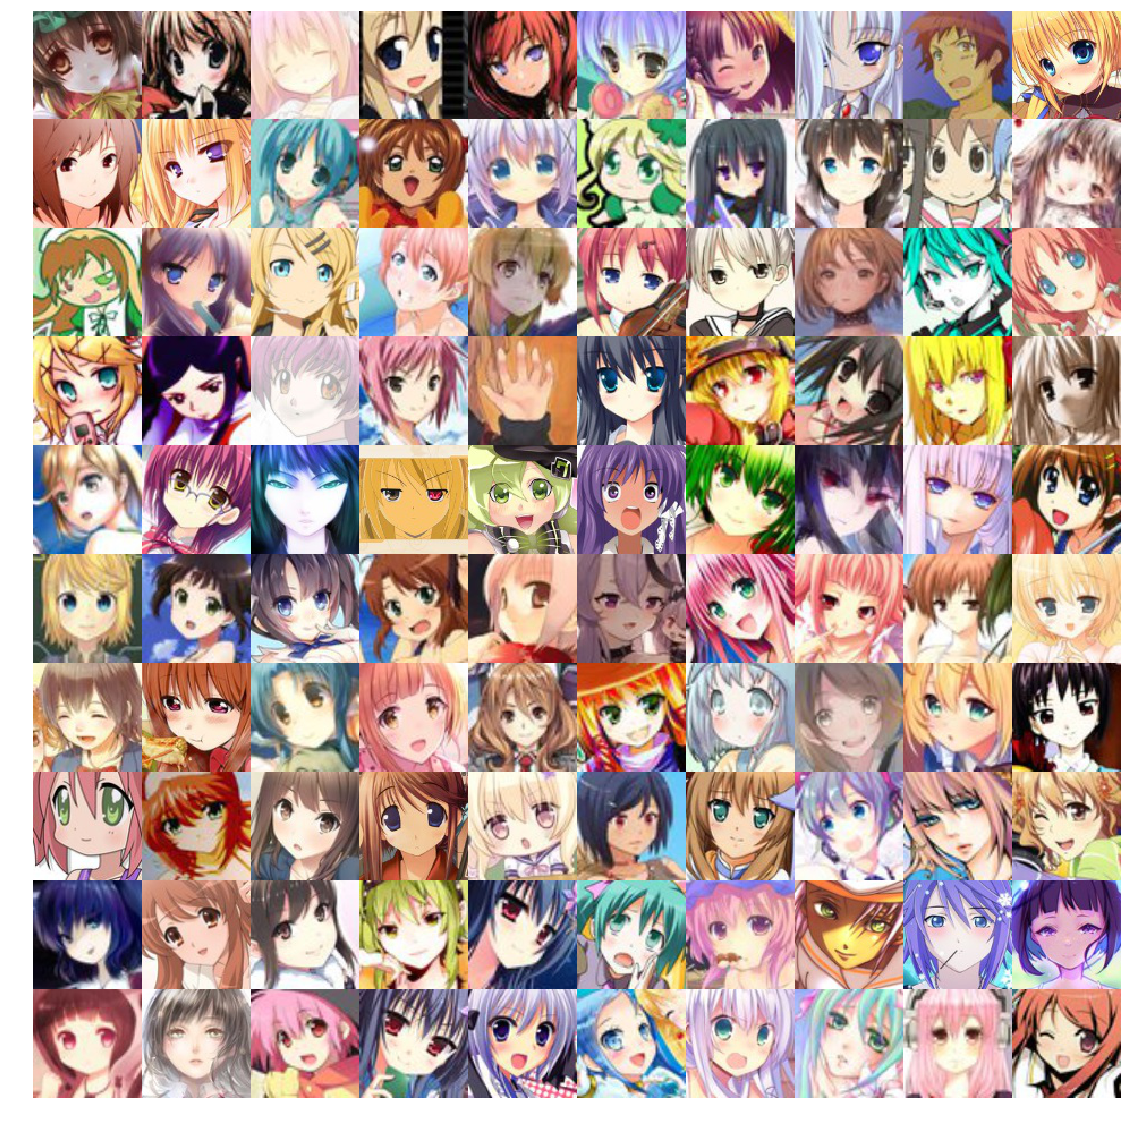

In [14]:
#combine using numpy
rows = int(IMAGE_TOTAL_SIZE/IMAGE_SIZE)
cols = int(IMAGE_TOTAL_SIZE/IMAGE_SIZE)
row_datas = []
for row in range(rows):
    datas = []
    for col in range(cols):
        datas.append(list[row*cols+col])
    row_datas.append(np.concatenate(datas,axis=1))
basemat = np.concatenate(row_datas,axis=0)
final_img=Image.fromarray(basemat,"RGB")
plt.figure(figsize=(20,20))
plt.imshow(np.array(final_img))
plt.axis("off")
plt.show()

In [28]:
##test code
data = np.ones((9,),np.uint8)
data = data.reshape((3,3))
data = data[None,...]
for i in range(1,9):
    data_raw = np.ones((9,),np.uint8) * (i+1)
    data_raw = data_raw.reshape((3,3))
    data_raw = data_raw[None,...]
    data = np.append(data,data_raw,axis=0)
print(data)

row1 = np.concatenate((data[0],data[1],data[2]),axis=1)
row2 = np.concatenate((data[3],data[4],data[5]),axis=1)
row3 = np.concatenate((data[6],data[7],data[8]),axis=1)

data = np.concatenate((row1,row2,row3),axis=0)
print(data)

[[[1 1 1]
  [1 1 1]
  [1 1 1]]

 [[2 2 2]
  [2 2 2]
  [2 2 2]]

 [[3 3 3]
  [3 3 3]
  [3 3 3]]

 [[4 4 4]
  [4 4 4]
  [4 4 4]]

 [[5 5 5]
  [5 5 5]
  [5 5 5]]

 [[6 6 6]
  [6 6 6]
  [6 6 6]]

 [[7 7 7]
  [7 7 7]
  [7 7 7]]

 [[8 8 8]
  [8 8 8]
  [8 8 8]]

 [[9 9 9]
  [9 9 9]
  [9 9 9]]]
[[1 1 1 2 2 2 3 3 3]
 [1 1 1 2 2 2 3 3 3]
 [1 1 1 2 2 2 3 3 3]
 [4 4 4 5 5 5 6 6 6]
 [4 4 4 5 5 5 6 6 6]
 [4 4 4 5 5 5 6 6 6]
 [7 7 7 8 8 8 9 9 9]
 [7 7 7 8 8 8 9 9 9]
 [7 7 7 8 8 8 9 9 9]]
